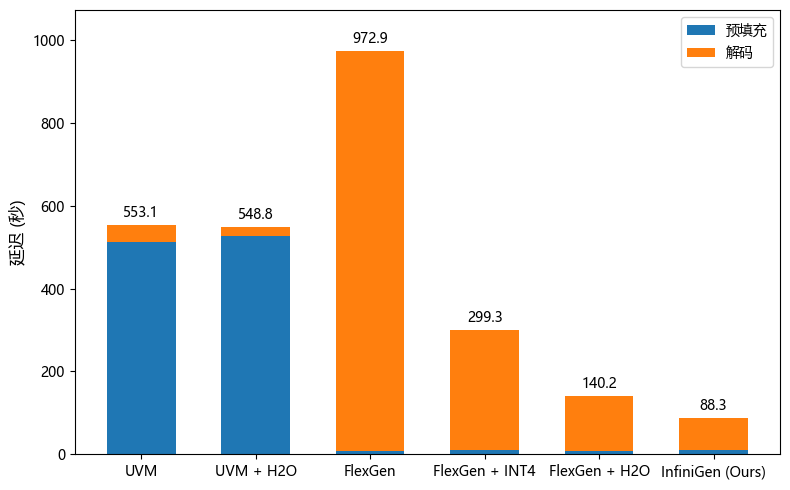

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体为微软雅黑
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体
rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块
# 定义函数以从文件中提取数据
def extract_data_from_log(file_path):
    labels = []
    prefill = []
    decode = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if 'Total' in lines[i]:
                # 提取标签
                labels.append(lines[i - 3].strip())  # 标题在前3行
                # 提取数值
                parts = lines[i].strip().split(' ')
                total = float(parts[1].replace('Total:', ''))
                prefill_value = float(parts[3].replace('Prefill:', ''))
                decode_value = float(parts[5].replace('Decode:', ''))
                prefill.append(prefill_value)
                decode.append(decode_value)
    return labels, prefill, decode

# 从文件提取数据
log_file_path = 'log'  # 假设文件名为 log
labels, prefill, decode = extract_data_from_log(log_file_path)

# 绘图代码
# X轴位置
x = np.arange(len(labels))

# 柱状图宽度
width = 0.6

# 创建图形
fig, ax = plt.subplots(figsize=(8, 5))

# 绘制柱状图
bar1 = ax.bar(x, prefill, width, label='预填充', color='#1f77b4')  # 蓝色柱状图
bar2 = ax.bar(x, decode, width, bottom=prefill, label='解码', color='#ff7f0e')  # 黄色柱状图叠加在Prefill上

# 添加标签、标题和图例
ax.set_ylabel('延迟 (秒)', fontsize=12)
# ax.set_title('Inference latency on OPT-13B', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)
ax.legend(fontsize=10)
ax.set_ylim(0, max(np.array(prefill) + np.array(decode)) + 100)  # 动态设置Y轴范围

# 添加每个柱子的总值注释
for i, (p, d) in enumerate(zip(prefill, decode)):
    ax.text(x[i], p + d + 10, f'{p + d:.1f}', ha='center', va='bottom', fontsize=10)

# 优化布局
plt.tight_layout()

# 显示图形
plt.show()

# 保存图形
fig.savefig('14.pdf')  # 保存为PNG格式